<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

**Name: Kunjal Patel**
Csulb ID: 030743321

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot.
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [21]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [22]:
real_image = np.array(Image.open('/lemon.jpeg'))

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





Shape of lemon image: (100, 100, 3)
Lemon Image Shape: (100, 100)


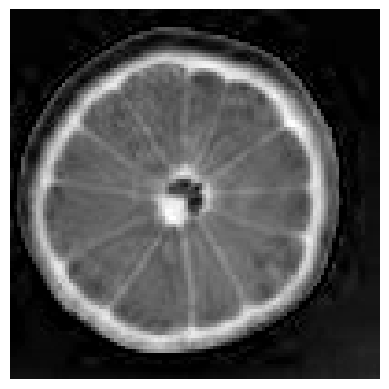

In [36]:
print("Shape of lemon image:", real_image.shape) # Prints the shape of the original image

img_single_channel = real_image[:, :, -1] # Extracts the last channel from the image

single_channel_shape = img_single_channel.shape #It gets the shape of the single-channel image

print("Lemon Image Shape:", single_channel_shape) # Prints the shape of the single-channel image

plt.imshow(img_single_channel, cmap='gray') # Displays the single-channel image in grayscale
plt.axis('off')
plt.show()

## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

Lemon Image Shape: (100, 100)


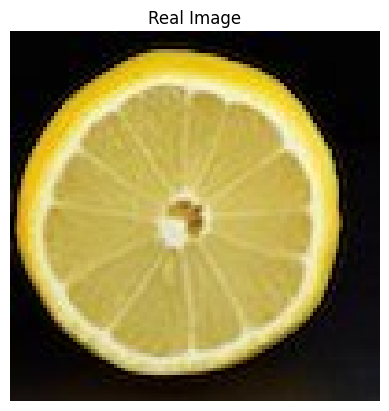

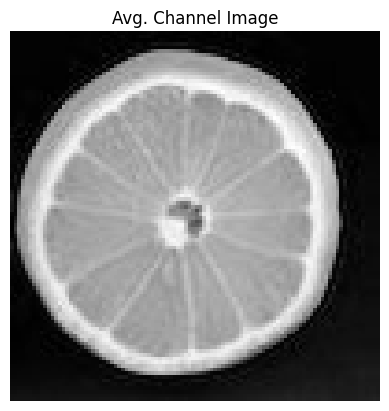

In [37]:
img_average_channel = np.mean(real_image, axis=2)# Calculate the average channel intensity by taking the mean along axis 2 (color channels)

print("Lemon Image Shape:", img_average_channel.shape)# Print the shape of the image

plt.imshow(real_image)# Display the original image
plt.axis('off')
plt.title('Real Image')
plt.show()

plt.imshow(img_average_channel, cmap='gray')# Display the image of the average channel in grayscale
plt.axis('off')
plt.title('Avg. Channel Image')
plt.show()

#As per the result of part 1 the result of part 2 looks more better.

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

In [38]:
identity_matrix = np.eye(img_average_channel.shape[0])#Shape of the matrix

row_index = np.random.randint(0, identity_matrix.shape[0])# It Randomly selects a row from the identity matrix

row_matrix = identity_matrix[row_index]# Get and print the selected row
print("Row Matrix:", row_matrix)

#here only 1 element is 1 and rest all are 0. It indicates the same position in the identity matrix.

Row Matrix: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`.

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [39]:
rows = np.arange(img_average_channel.shape[0])# Create an array of row indices

np.random.shuffle(rows)# Shuffle the row indices

print("Shuffled Rows:", rows)# Print rows and the elements

#Here the rows has a random order of numbers from 0 to - 1 determining how the rows will be rearranged.

Shuffled Rows: [45 32 17  5  1 61 82  3 90 49 47 26 81 74 99 91 30 89 83 64 78 40 16 86
 43 36 18  6 52 22 23 60 46 92 79 21 38 69  0 59 53 94 15 57 84 66 24 37
 67  8 68 34 96 31 39 98  7 44 35 63 56 12 75 62 10 58 28 76 71 50  9 72
 80 25 55 20 54 33 13 85  4 51 41 27 70 97 95 87 65 73 11 93 42 14 19 77
  2 29 88 48]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [40]:
T = identity_matrix[rows]# Create a new matrix T from identity_matrix

print("T: Shape:", T.shape)# Print the shape of T such that it has the same size as identity_matrix and img_average_channel

if T.shape[0] != img_average_channel.shape[0]:# Reshape T to match the size of img_average_channel
    T = T.T  # Transpose T

print("T: Shape after transpose:", T.shape)# Print the shape of T again such that it matches img_average_channel

#So here both the matrix have same size.

T: Shape: (100, 100)
T: Shape after transpose: (100, 100)


## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see.
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image.

Transformed Image Shape: (100, 100)


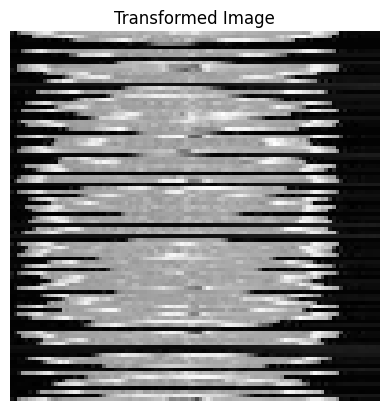

In [41]:
transformed_image = np.dot(T, img_average_channel)# Matrix multiply T and img_average_channel

print("Transformed Image Shape:", transformed_image.shape)# Checking the shape of the result

plt.imshow(transformed_image, cmap='gray')# Plot transformed_image
plt.axis('off')
plt.title('Transformed Image')
plt.show()

# Comment: The transformation has reordered the rows of img_average_channel based on the shuffled row indices,
# resulting in a different pattern in the transformed image. Each dot product in the matrix multiplication
# combines rows from img_average_channel based on the shuffled order.

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

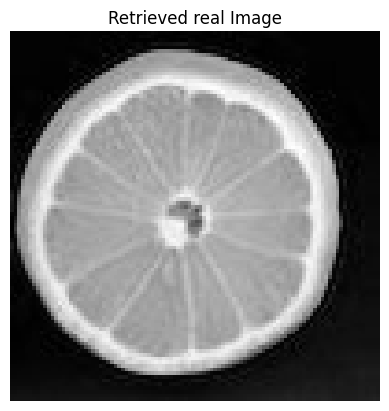

In [43]:
inv_T = np.linalg.det(T)# Calculate the determinant of T

if inv_T != 0:# Checking if T is invertible
    Tinv = np.linalg.inv(T) # Compute the inverse of T and store it in Tinv

    real_img = np.dot(Tinv, transformed_image)# Inverse of scrambling operation

    plt.imshow(real_img, cmap='gray')#plotting the result
    plt.title('Retrieved real Image')
    plt.axis('off')
    plt.show()
else:
    print("Matrix T is not invertible.")

## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image.

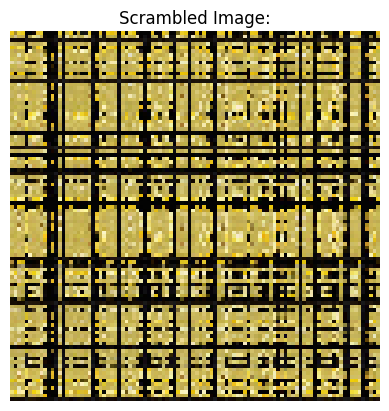

In [48]:
image_transposed = real_image.transpose(1, 0, 2)# Transpose the real image such that it work on columns

cols = np.arange(image_transposed.shape[0])# Repeat the operations for columns
np.random.shuffle(cols)
T_cols = np.identity(image_transposed.shape[0])[cols]
Tinv_cols = np.linalg.inv(T_cols)
trans_image = np.dot(T_cols, image_transposed)
real_image_cols = np.dot(Tinv_cols, trans_image)

real_image_cols = real_image_cols.transpose(1, 0, 2)# Transpose the result back to the original orientation

plt.imshow(real_image_cols.astype(np.uint8))# Plot the scrambled image for proof of concept
plt.title('Scrambled Image:')
plt.axis('off')
plt.show()